In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from pathlib import Path
import numpy as np
import mmcv
import matplotlib.pyplot as plt
import cv2
###############################################################
# config_file = 'checkpoints/Craters/cascade_mask50/cascade_mask50_2022-08-05T15:15:10_768_25e_Craters_lr_0.002_CosineAnnealing/Cascade_Mask_RCNN.py'
# checkpoint_file = 'checkpoints/Craters/cascade_mask50/cascade_mask50_2022-08-05T15:15:10_768_25e_Craters_lr_0.002_CosineAnnealing/epoch_10.pth'
# # build the model from a config file and a checkpoint file
# model = init_detector(config_file, checkpoint_file, device='cuda:0')

# SAR Wakes

In [18]:
config_file = '/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/SARWake/mask50/mask50_2023-01-29T16:53:13_768_25e_SARWake_lr_0.002_CosineAnnealing/Mask_RCNN_r50.py'
checkpoint_file = '/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/SARWake/mask50/mask50_2023-01-29T16:53:13_768_25e_SARWake_lr_0.002_CosineAnnealing/epoch_25.pth'
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/SARWake/mask50/mask50_2023-01-29T16:53:13_768_25e_SARWake_lr_0.002_CosineAnnealing/epoch_25.pth


In [47]:
img_path = 'Images/SEASAR/Sen1/Screenshot 2023-01-29 alle 20.15.22 (copy).png'


img_path = Path(img_path)
img = cv2.imread(img_path.as_posix())
shape = mmcv.imread(img_path).shape[0]
result = inference_detector(model, img)
out_file = f'/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/Images/SEASAR/D_'+img_path.stem + '.png'

print(out_file)
model.show_result(
     img,
     result,
     score_thr=0.3,
     show=True,
     wait_time=0,
     win_name=None,
     bbox_color=(0, 255, 255),
     text_color=(255, 255, 255),
     thickness=5,
     font_size=shape//40,
     mask_color=(0, 255, 255),
     out_file=out_file)


/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/Images/SEASAR/D_Screenshot 2023-01-29 alle 20.15.22 (copy).png


# Crateri

In [ ]:
config_file = 'checkpoints/Craters/cascade_mask50/cascade_mask50_2022-08-05T15:15:10_768_25e_Craters_lr_0.002_CosineAnnealing/Cascade_Mask_RCNN.py'
checkpoint_file = 'checkpoints/Craters/cascade_mask50/cascade_mask50_2022-08-05T15:15:10_768_25e_Craters_lr_0.002_CosineAnnealing/epoch_10.pth'
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image
import matplotlib.pyplot as plt
import cv2

images = Path('Images_craters').glob('**/*')
for img_path in images:
     img = cv2.imread(img_path.as_posix())
     shape = mmcv.imread(img_path).shape[0]

     result = inference_detector(model, img)
     out_file = f'Images_craters/F_'+img_path.name
     # out_file = None
     print(out_file)
     model.show_result(
          img,
          result,
          score_thr=0.7,
          show=True,
          wait_time=0,
          win_name=None,
          bbox_color=(0, 255, 255),
          text_color=(255, 255, 255),
          thickness=5,
          font_size=shape//40,
          mask_color=None,
          out_file=out_file)

# Multi-Spectral Wakes

In [3]:
config_file = 'checkpoints/B4/retina_swin/retina_swin_2022-07-28T22:15:36_768_50e_B4_lr_0.001_step/retinanet_swin-t-p4-w7_fpn_1x_coco.py'
checkpoint_file = 'checkpoints/B4/retina_swin/retina_swin_2022-07-28T22:15:36_768_50e_B4_lr_0.001_step/epoch_44.pth'
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: checkpoints/B4/retina_swin/retina_swin_2022-07-28T22:15:36_768_50e_B4_lr_0.001_step/epoch_44.pth


In [28]:
import pandas as pd 

img = cv2.imread("/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/Images/test_Landsat9/VIEW2.png")
img = img[350:-350,170:-170]
result = inference_detector(model, img)
out_file = f'Images/test_Landsat9/img.png'
# out_file = None
print(out_file)
shape = mmcv.imread("Images/test_Landsat9/WhatsApp Image 2022-08-29 at 14.35.43 (1).jpeg").shape[0]

model.show_result(
     img,
     result,
     score_thr=0.5,
     show=True,
     wait_time=0,
     win_name=None,
     bbox_color=(0, 255, 255),
     text_color=(255, 255, 255),
     thickness=5,
     font_size=shape//20,
     mask_color=None,
     out_file=out_file)

Images/test_Landsat9/img.png


Images/IAC22/B2.png
Images/IAC22/B3.png
Images/IAC22/B4.png
Images/IAC22/B8.png


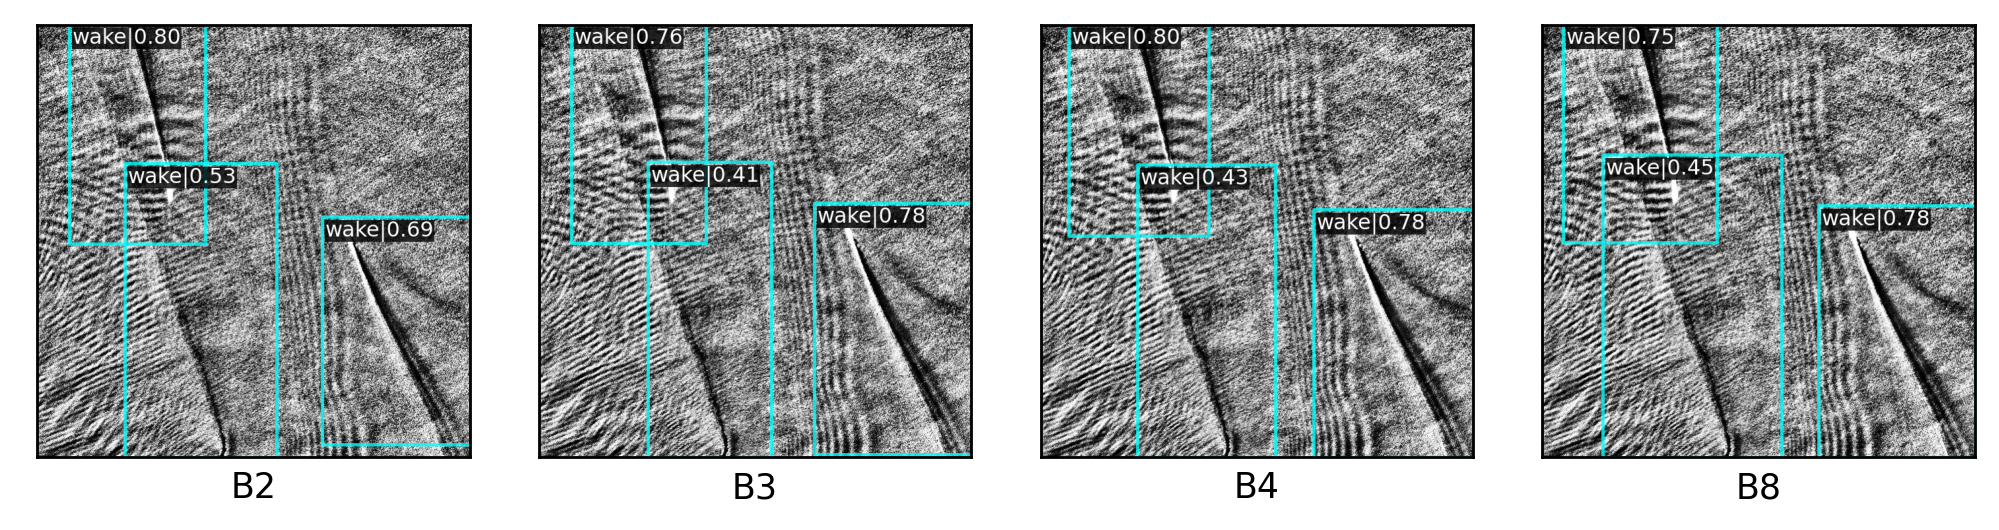

In [22]:
# test a single image
import os
#################################################################
OUTDIR='Images/IAC22'
bands = ['B2','B3','B4','B8']
for band in bands:
     img_path = f'data/DATASETS/{band}/val2017/subset_4_of_S2A_MSIL2A_20210628T103021_N0300_R108_T33VUD_20210628T152020.png'
     # data/DATASETS/B4/val2017/subset_4_of_S2A_MSIL2A_20210628T103021_N0300_R108_T33VUD_20210628T152020.png
     img_path = Path(img_path)
     Name = img_path.stem
     shape = mmcv.imread(img_path.as_posix()).shape[0]
     img = cv2.imread(img_path.as_posix())
     
     result = inference_detector(model, img)
     out_file = f'{OUTDIR}/{band}.png'
     # out_file = None
     print(out_file)
     model.show_result(
          img,
          result,
          score_thr=0.4,
          show=True,
          wait_time=0,
          win_name=None,
          bbox_color=(0, 255, 255),
          text_color=(255, 255, 255),
          thickness=5,
          font_size=shape//20,
          mask_color=None,
          out_file=out_file)

#################################################################
#################################################################

fig, ax = plt.subplots(1,4, sharex=True, sharey=True, dpi=250, figsize=(10,10))
i = 0
for band in bands:
     img_path = f'Images/IAC22/{band}.png'
     img_path = Path(img_path)
     img =cv2.cvtColor(cv2.imread(img_path.as_posix()), cv2.COLOR_BGR2RGB)
     ax[i].imshow(img)
     ax[i].set_xlabel(band)
     ax[i].set_yticks([])
     ax[i].set_xticks([])
     i += 1

plt.subplots_adjust(wspace=0.16, hspace=0.1)
plt.show()
# # fig.savefig(f'{OUTDIR}/IMG.eps')
fig.savefig(f'{OUTDIR}/{Name}.png', bbox_inches='tight')


# All network single image

In [ ]:
inference_sel = {'cascade101':['checkpoints/B2/cascade_mask101/cascade_mask101_2022-07-10T18:59:06_712_50e_B2_lr_0.001/Cascade_Mask_RCNN_101.py','checkpoints/B2/cascade_mask101/cascade_mask101_2022-07-10T18:59:06_712_50e_B2_lr_0.001/epoch_36.pth'],
               'vfnet':['checkpoints/B2/vfnet/vfnet_2022-07-16T05:02:19_768_50e_B2_lr_0.001_step/vfnet_r50.py','checkpoints/B2/vfnet/vfnet_2022-07-16T05:02:19_768_50e_B2_lr_0.001_step/epoch_45.pth'],
               'retina18':['checkpoints/B2/retina18/retina18_2022-07-11T20:10:38_768_100e_B2_lr_0.0005_Cosine/RetinaNet_18.py','checkpoints/B2/retina18/retina18_2022-07-11T20:10:38_768_100e_B2_lr_0.0005_Cosine/epoch_70.pth'],
               'retina34':['checkpoints/B2/retina34/retina34_2022-07-20T04:26:10_768_50e_B2_lr_0.001_step/RetinaNet_34.py','checkpoints/B2/retina34/retina34_2022-07-20T04:26:10_768_50e_B2_lr_0.001_step/epoch_48.pth'],
               'retina50':['checkpoints/B2/retina50/retina50_2022-07-09T01:49:52_712_50e_B2_lr_0.001/RetinaNet_50.py','checkpoints/B2/retina50/retina50_2022-07-09T01:49:52_712_50e_B2_lr_0.001/epoch_35.pth'],
               'retina101':['checkpoints/B2/retina101/retina101_2022-07-09T13:47:42_712_50e_B2_lr_0.001/RetinaNet_101.py','checkpoints/B2/retina101/retina101_2022-07-09T13:47:42_712_50e_B2_lr_0.001/epoch_37.pth'],
               'retina_swin':['checkpoints/B2/retina_swin/retina_swin_2022-07-20T18:45:50_768_50e_B2_lr_0.001_CosineAnnealing/retinanet_swin-t-p4-w7_fpn_1x_coco.py','checkpoints/B2/retina_swin/retina_swin_2022-07-20T18:45:50_768_50e_B2_lr_0.001_CosineAnnealing/epoch_37.pth'],
               'fovea101':['checkpoints/B2/fovea101/fovea101_2022-07-19T07:24:39_768_50e_B2_lr_0.001_step/fovea_r101_fpn_4x4_1x_coco.py','checkpoints/B2/fovea101/fovea101_2022-07-19T07:24:39_768_50e_B2_lr_0.001_step/epoch_34.pth'],
               'centernet18':['checkpoints/B2/centernet18/centernet18_2022-07-18T11:03:43_768_50e_B2_lr_0.001_CosineAnnealing/centernet_resnet18_dcnv2.py','checkpoints/B2/centernet18/centernet18_2022-07-18T11:03:43_768_50e_B2_lr_0.001_CosineAnnealing/epoch_38.pth'],
               'faster50':['checkpoints/B2/faster50/faster50_2022-07-18T13:39:06_768_50e_B2_lr_0.001_step/faster_rcnn_r50_fpn.py','checkpoints/B2/faster50/faster50_2022-07-18T13:39:06_768_50e_B2_lr_0.001_step/epoch_43.pth'],
               'mask50':['checkpoints/B2/mask50/mask50_2022-07-10T23:44:13_712_50e_B2_lr_0.001/Mask_RCNN_r50.py','checkpoints/B2/mask50/mask50_2022-07-10T23:44:13_712_50e_B2_lr_0.001/epoch_36.pth'],
               'cascade_hrnet':['checkpoints/B2/hrnet40_cascade/hrnet_cascade_atHand/hrnet402022-07-06T08:56:37_712_40e_B4_lr_0.01/HrNet_w40_cascade.py','checkpoints/B2/hrnet40_cascade/hrnet_cascade_atHand/hrnet402022-07-06T08:56:37_712_40e_B4_lr_0.01/epoch_21.pth'],
               'fcos50':['checkpoints/B2/fcos50/fcos50_2022-07-18T17:27:53_768_50e_B2_lr_0.001_step/fcos_r50_caffe_fpn_gn-head_1x_coco.py','checkpoints/B2/fcos50/fcos50_2022-07-18T17:27:53_768_50e_B2_lr_0.001_step/epoch_49.pth'],
               'retina_eff':['checkpoints/B2/efficientdet/efficientdet_2022-07-17T18:11:09_768_100e_B2_lr_0.001_step/retinanet_effb3_fpn_crop896_8x4_1x_coco.py','checkpoints/B2/efficientdet/efficientdet_2022-07-17T18:11:09_768_100e_B2_lr_0.001_step/epoch_34.pth'],
               'htc50':['checkpoints/B2/htc50/htc50_2022-07-19T17:32:54_768_50e_B2_lr_0.0005_step/htc_without_semantic_r50_fpn_1x_coco.py','checkpoints/B2/htc50/htc50_2022-07-19T17:32:54_768_50e_B2_lr_0.0005_step/epoch_4.pth'],
               'fovea50':['checkpoints/B2/fovea50/fovea50_2022-07-16T13:23:15_768_50e_B2_lr_0.001_CosineAnnealing/fovea_r50_fpn_4x4_1x_coco.py','checkpoints/B2/fovea50/fovea50_2022-07-16T13:23:15_768_50e_B2_lr_0.001_CosineAnnealing/epoch_37.pth'],
               'sparce_rcnn':['checkpoints/B2/sparce_rcnn50/sparce_rcnn50_2022-07-16T16:20:26_768_50e_B2_lr_0.001_CosineAnnealing/sparce_rcnn.py','checkpoints/B2/sparce_rcnn50/sparce_rcnn50_2022-07-16T16:20:26_768_50e_B2_lr_0.001_CosineAnnealing/epoch_48.pth'],
               }
models = list(inference_sel.keys())

In [ ]:
# test a single image
import matplotlib.pyplot as plt
import cv2
images = Path('/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/data/coco/val2017').glob('**/*')
images = [x for x in images if x.is_file()]

filt = [x for x in images if x.stem == 'subset_7_of_S2A_MSIL2A_20210605T102021_N0300_R065_T33UUA_20210605T132908_LIL_BIT_SHORE']
# idx = np.random.randint(0, len(images))
# img = images[idx]
img_path = filt[0]
img = cv2.imread(img_path.as_posix())
 
off_x, off_y = 300, 0

# img = img[off_y:off_y+1050,off_x:off_x+1050,:]

for M in models:
  # Load Model
  model_files = inference_sel[M]
  config_file, checkpoint_file = model_files
  model = init_detector(config_file, checkpoint_file, device='cuda:0')

  result = inference_detector(model, img)
  # show the results
  # show_result_pyplot(model, img, result,score_thr=0.7, title='result', palette=(0,255,255), out_file='prova.png')
  shape = mmcv.imread(img_path).shape[0]
  print(shape)
  out_file = f'Images/{M}___'+img_path.name
  print(out_file)
  model.show_result(
          img,
          result,
          score_thr=0.7,
          show=True,
          wait_time=0,
          win_name=None,
          bbox_color=(0, 255, 255),
          text_color=(255, 255, 255),
          thickness=5,
          font_size=shape//40,
          mask_color=None,
          out_file=out_file)

In [ ]:
# test a single image
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

paths = [x for x in Path('/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/Images/test6').glob('**/*')]

fig, ax = plt.subplots(4,4, sharex=True, sharey=True, dpi=120, figsize=(10,10))
i, j = 0, 0
for path in paths:
     img =cv2.cvtColor(cv2.imread(path.as_posix()), cv2.COLOR_BGR2RGB)
     ax[i,j].imshow(img)
     ax[i,j].set_xlabel(path.stem.split('___')[0])
     ax[i,j].set_yticks([])
     ax[i,j].set_xticks([])
     i += 1
     if i == 4:
          i=0
          j+=1
plt.subplots_adjust(wspace=0.16, hspace=0.1)
fig.savefig('Images/test6.eps')
fig.savefig('Images/test6.png')

# Test on ALL DATASET

In [ ]:

import matplotlib.pyplot as plt
images = Path('/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/data/coco/val2017').glob('**/*')
images = [x for x in images if x.is_file()]
for img in images:
     result = inference_detector(model, img)
     # show the results
     # show_result_pyplot(model, img, result,score_thr=0.7, title='result', palette=(0,255,255), out_file='prova.png')
     shape = mmcv.imread(img).shape[0]
     print(shape)
     out_file = '/home/sirbastiano/Documenti/Scripts/MMDETv2/mmdetection/checkpoints/B2/cascade_mask101/cascade_mask101_2022-07-10T18:59:06_712_50e_B2_lr_0.001/Output_testset/'+img.name
     print(out_file)
     model.show_result(
          img,
          result,
          score_thr=0.7,
          show=True,
          wait_time=0,
          win_name=None,
          bbox_color=(0, 255, 255),
          text_color=(255, 255, 255),
          thickness=5,
          font_size=shape//30,
          mask_color=None,
          out_file=out_file)